# Step 2: EDA

In [1]:
## Imports
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


### Read in step 1 data

In [2]:
# Import the data from part 1
both_posts_imp = pd.read_csv('../data/both_posts_step1_xl.csv')
both_posts_imp.drop(columns="Unnamed: 0", inplace=True)
both_posts_imp.head()

,created_utc,selftext,subreddit,title,ds_ind
0,1638348806,Ideally would love a program that goes at my o...,datascience,Can a master's in DS from WGU or like universi...,1
1,1638348235,NaN,datascience,Data Scientists in Germany: What to expect as ...,1
2,1638344086,NaN,datascience,How's Pluralsight for Data Science?,1
3,1638341696,I am trying to implement this for car dashcam ...,datascience,vid2depth on custom video,1
4,1638333037,\n\nShould I buy this offer if I now the basi...,datascience,DataCamp CyberMonday Offer,1


In [3]:
both_posts_imp.shape

(19996, 5)

In [4]:
both_posts_imp.isnull().sum()

created_utc       0
selftext       3520
subreddit         0
title             0
ds_ind            0
dtype: int64

In [5]:
both_posts_imp['subreddit'].value_counts()

datascience    10000
analytics       9996
Name: subreddit, dtype: int64

In [6]:
#Inspect target and title
eda1=both_posts_imp.filter(["subreddit","title"])
eda1.sort_values('title')

,subreddit,title
14711,analytics,"""A theory of everything"":Mathematics shown to ..."
14246,analytics,"""Avg Page Load time(sec.)"" metric formula in G..."
10064,analytics,"""Betting in the economic perspetives"""
15974,analytics,"""Data Analyst"" without analytics skills. Looki..."
7247,datascience,"""Data scientists will be extinct in 10 years"" ..."
...,...,...
1283,datascience,😍Straight out of science fiction: Separate cli...
14593,analytics,😓 Monthly/Quarterly Reporting Dreadful
8044,datascience,🚀 How to Crack the Facebook Data Scientist Int...
2128,datascience,🤯🖼️Remove any object or person in an image eas...


In [7]:
#create length of each title 
eda1['length']=eda1['title'].apply(len)

In [8]:
#create word count column of each title
eda1['word_count']=eda1['title'].apply(lambda x: len(x.split()))

In [9]:
eda1.describe()

,length,word_count
count,19996.000000,19996.000000
mean,58.783357,9.660632
std,35.908668,6.377329
min,1.000000,1.000000
25%,36.000000,6.000000
50%,52.000000,8.000000
75%,72.000000,12.000000
max,304.000000,61.000000


* For both subreddits, the average word count is 9.7, ranging from 1 to 61 words per post

In [10]:
#Create a df for data science and analytics

df_analytics=eda1[eda1['subreddit']=='analytics']
df_datascience=eda1[eda1['subreddit']=='datascience']
df_analytics.head()
df_datascience.head()

,subreddit,title,length,word_count
0,datascience,Can a master's in DS from WGU or like universi...,96,18
1,datascience,Data Scientists in Germany: What to expect as ...,53,9
2,datascience,How's Pluralsight for Data Science?,35,5
3,datascience,vid2depth on custom video,25,4
4,datascience,DataCamp CyberMonday Offer,26,3


In [11]:
df_analytics.describe()

,length,word_count
count,9996.000000,9996.000000
mean,58.929372,9.587335
std,34.099003,6.031489
min,1.000000,1.000000
25%,37.000000,6.000000
50%,53.000000,8.000000
75%,73.000000,12.000000
max,300.000000,59.000000


* For the Analytics subreddit, the average word count is 9.6, ranging from 1 to 59 words per post (slightly below aggregated average)

In [12]:
df_datascience.describe()

,length,word_count
count,10000.000000,10000.000000
mean,58.637400,9.733900
std,37.631882,6.704729
min,1.000000,1.000000
25%,35.000000,5.000000
50%,51.000000,8.000000
75%,72.000000,12.000000
max,304.000000,61.000000


* For the Data Science subreddit, the average word count is 9.7, ranging from 1 to 61 words per post

### Data Visualizations

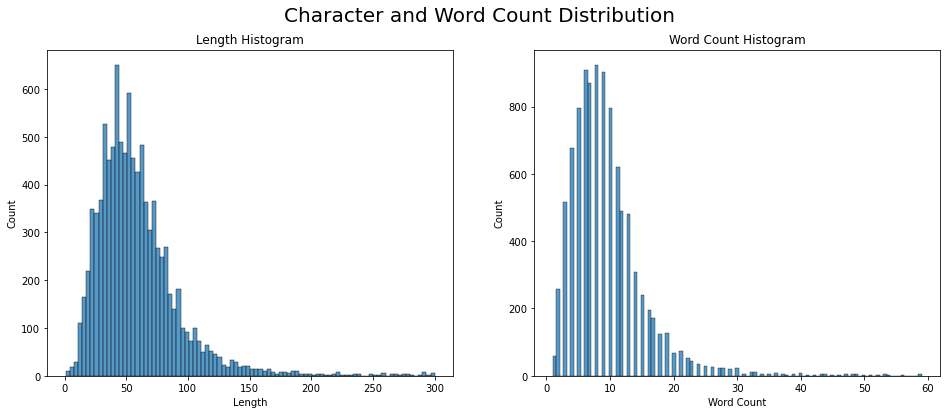

In [13]:
#Plot Length & Word Count for Analytics

fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df_analytics['length'], ax=ax[0])
sns.histplot(df_analytics['word_count'], ax=ax[1])
ax[0].set(xlabel='Length', ylabel='Count', title='Length Histogram')
ax[1].set(xlabel='Word Count', ylabel='Count', title='Word Count Histogram')

fig.suptitle('Character and Word Count Distribution', fontsize=20);

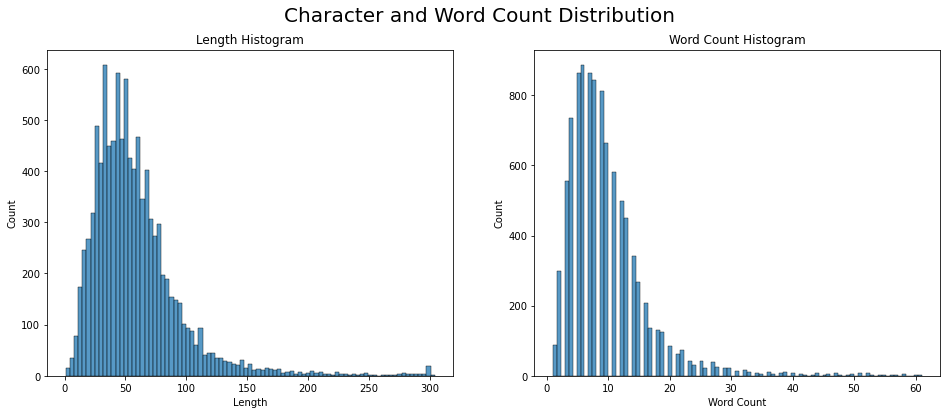

In [14]:
#Plot Length & Word Count for Data Science

fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df_datascience['length'], ax=ax[0])
sns.histplot(df_datascience['word_count'], ax=ax[1])
ax[0].set(xlabel='Length', ylabel='Count', title='Length Histogram')
ax[1].set(xlabel='Word Count', ylabel='Count', title='Word Count Histogram')

fig.suptitle('Character and Word Count Distribution', fontsize=20);

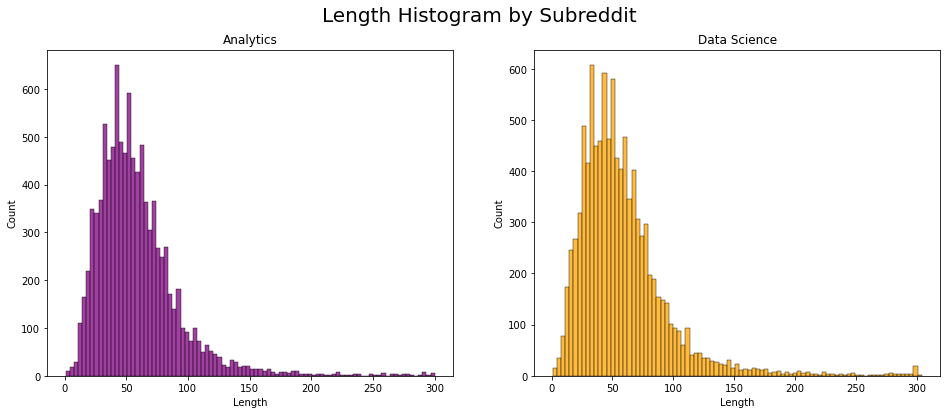

In [15]:
# Compare length for analytics vs data science

fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df_analytics['length'], ax=ax[0], color='purple')
sns.histplot(df_datascience['length'], ax=ax[1], color='orange')
ax[0].set(xlabel='Length', ylabel='Count', title='Analytics')
ax[1].set(xlabel='Length', ylabel='Count', title='Data Science')

fig.suptitle('Length Histogram by Subreddit', fontsize=20);

* Both subreddits have a very similar distribution in length of title post. It follows a normal distribution but is slightly skewed due to high value outliers on the right.

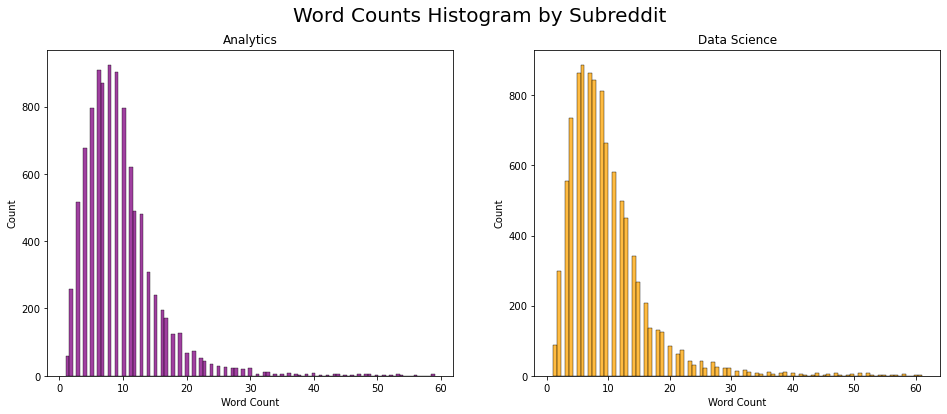

In [16]:
# Compare word count for analytics vs data science

fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df_analytics['word_count'], ax=ax[0], color='purple')
sns.histplot(df_datascience['word_count'], ax=ax[1], color='orange')
ax[0].set(xlabel='Word Count', ylabel='Count', title='Analytics')
ax[1].set(xlabel='Word Count', ylabel='Count', title='Data Science')

fig.suptitle('Word Counts Histogram by Subreddit', fontsize=20);

* Both subreddits have a very similar distribution in word counts. It follows a semi-normal distribution but is slightly skewed due to high value outliers on the right.

### Baseline Accuracy for Comparison

In [17]:
both_posts_imp['subreddit'].value_counts(normalize=True)

datascience    0.5001
analytics      0.4999
Name: subreddit, dtype: float64

### Create Stopwords Lists

In [18]:
stopwords_custom1 = nltk.corpus.stopwords.words('english')
stopwords_custom1.append("data science")
stopwords_custom1.append("data")
stopwords_custom1.append("analytics")
stopwords_custom1.append("science")
stopwords_custom1.append("scientists")

In [19]:
stopwords_custom2 = nltk.corpus.stopwords.words('english')
stopwords_custom2.append("data science")
stopwords_custom2.append("data")
stopwords_custom2.append("analytics")
stopwords_custom2.append("science")
stopwords_custom2.append("scientists")
stopwords_custom2.append("get")
stopwords_custom2.append("amp")
stopwords_custom2.append("would")
stopwords_custom2.append("using")
stopwords_custom2.append("use")
stopwords_custom2.append("2019")
stopwords_custom2.append("2025")

### Count Vectorizer Visualizations
* This converts documents into vector representations of word occurances

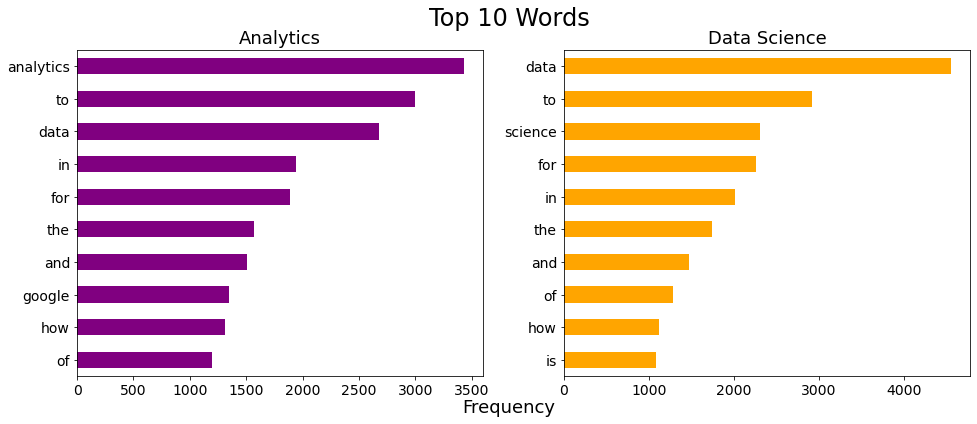

In [20]:
# view top 10 words with no stop words
cv = CountVectorizer()
df_analytics_vect=cv.fit_transform(df_analytics['title'])
df_analytics_vect2= pd.DataFrame(df_analytics_vect.todense(), columns=cv.get_feature_names())
df_analytics_vect2.head()

df_datascience_vect=cv.fit_transform(df_datascience['title'])
df_datascience_vect2= pd.DataFrame(df_datascience_vect.todense(), columns=cv.get_feature_names())
df_datascience_vect2.head()


fig, ax = plt.subplots(1,2,figsize=(16,6))
df_analytics_vect2.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='purple', ax=ax[0], fontsize=14)
df_datascience_vect2.sum().sort_values(ascending=False).head(10).plot(kind='barh',color='orange', ax=ax[1], fontsize=14)

ax[0].set_title('Analytics', fontsize=18)
ax[1].set_title('Data Science', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle("Top 10 Words", fontsize=24)
fig.text(0.5,.04, 'Frequency', ha='center', fontsize=18);

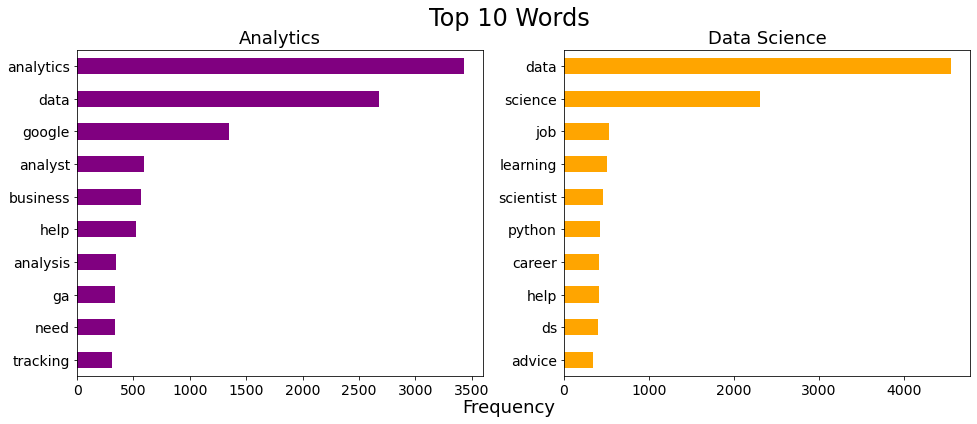

In [21]:
# view top 10 words with English stop words 

cv_eng = CountVectorizer(stop_words='english')

df_analytics_vect2=cv_eng.fit_transform(df_analytics['title'])
df_analytics_vect2a= pd.DataFrame(df_analytics_vect2.todense(), columns=cv_eng.get_feature_names())


df_datascience_vect2=cv_eng.fit_transform(df_datascience['title'])
df_datascience_vect2a= pd.DataFrame(df_datascience_vect2.todense(), columns=cv_eng.get_feature_names())


fig, ax = plt.subplots(1,2,figsize=(16,6))
df_analytics_vect2a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='purple',ax=ax[0], fontsize=14)
df_datascience_vect2a.sum().sort_values(ascending=False).head(10).plot(kind='barh',color='orange',ax=ax[1], fontsize=14)

ax[0].set_title('Analytics', fontsize=18)
ax[1].set_title('Data Science', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle("Top 10 Words", fontsize=24)
fig.text(0.5,.04, 'Frequency', ha='center', fontsize=18);

* Unsurprisingly, data is a top term

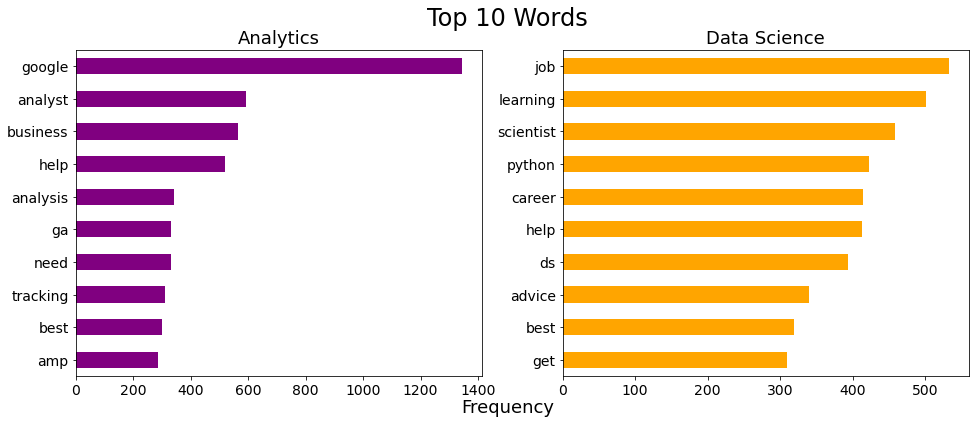

In [22]:
# view top 10 words with custom stop words 1
cv_custom1 = CountVectorizer(stop_words=stopwords_custom1)

df_analytics_vect3=cv_custom1.fit_transform(df_analytics['title'])
df_analytics_vect3a= pd.DataFrame(df_analytics_vect3.todense(), columns=cv_custom1.get_feature_names())


df_datascience_vect3=cv_custom1.fit_transform(df_datascience['title'])
df_datascience_vect3a= pd.DataFrame(df_datascience_vect3.todense(), columns=cv_custom1.get_feature_names())



fig, ax = plt.subplots(1,2,figsize=(16,6))
df_analytics_vect3a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='purple', ax=ax[0], fontsize=14)
df_datascience_vect3a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='orange', ax=ax[1], fontsize=14)

ax[0].set_title('Analytics', fontsize=18)
ax[1].set_title('Data Science', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle("Top 10 Words", fontsize=24)
fig.text(0.5,.04, 'Frequency', ha='center', fontsize=18);

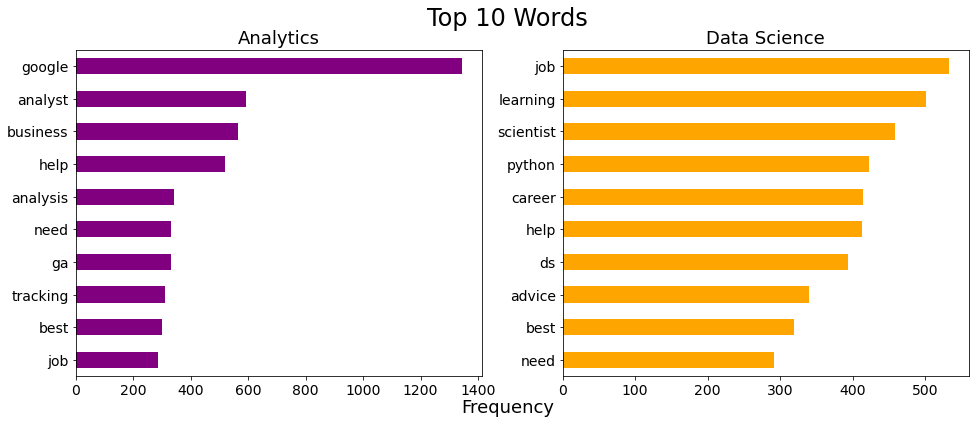

In [23]:
## view top 10 words with custom stop words 2
cv_custom2 = CountVectorizer(stop_words=stopwords_custom2)

df_analytics_vect4=cv_custom2.fit_transform(df_analytics['title'])
df_analytics_vect4a= pd.DataFrame(df_analytics_vect4.todense(), columns=cv_custom2.get_feature_names())


df_datascience_vect4=cv_custom2.fit_transform(df_datascience['title'])
df_datascience_vect4a= pd.DataFrame(df_datascience_vect4.todense(), columns=cv_custom2.get_feature_names())


fig, ax = plt.subplots(1,2,figsize=(16,6))
df_analytics_vect4a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='purple', ax=ax[0], fontsize=14)
df_datascience_vect4a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='orange', ax=ax[1], fontsize=14)

ax[0].set_title('Analytics', fontsize=18)
ax[1].set_title('Data Science', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle("Top 10 Words", fontsize=24)
fig.text(0.5,.04, 'Frequency', ha='center', fontsize=18);

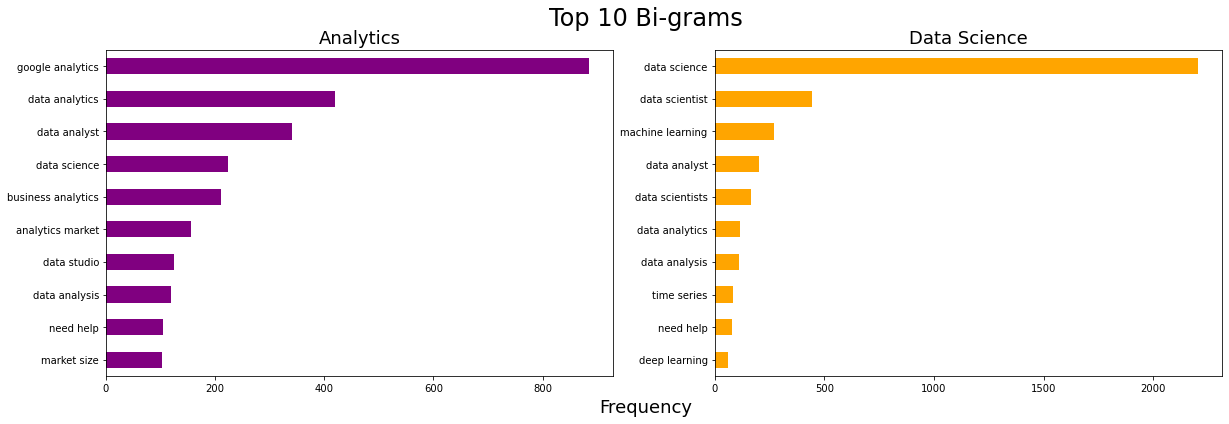

In [24]:
# view top 10 bigrams with English stop words
cv_custom5 = CountVectorizer(stop_words='english', ngram_range=(2,2))

df_analytics_vect5=cv_custom5.fit_transform(df_analytics['title'])
df_analytics_vect5a= pd.DataFrame(df_analytics_vect5.todense(), columns=cv_custom5.get_feature_names())


df_datascience_vect5=cv_custom5.fit_transform(df_datascience['title'])
df_datascience_vect5a= pd.DataFrame(df_datascience_vect5.todense(), columns=cv_custom5.get_feature_names())

fig, ax = plt.subplots(1,2,figsize=(20,6))
df_analytics_vect5a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='purple', ax=ax[0], fontsize=10)
df_datascience_vect5a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='orange', ax=ax[1], fontsize=10)

ax[0].set_title('Analytics', fontsize=18)
ax[1].set_title('Data Science', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle("Top 10 Bi-grams", fontsize=24)
fig.text(0.5,.04, 'Frequency', ha='center', fontsize=18);


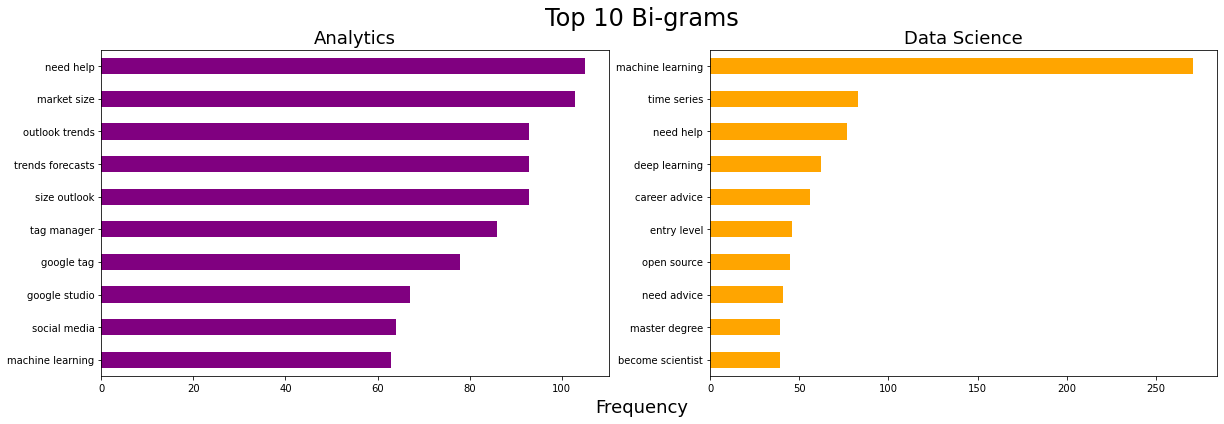

In [25]:
# English stop words plus ngram_range
cv_custom5 = CountVectorizer(stop_words=stopwords_custom2, ngram_range=(2,2))

df_analytics_vect5=cv_custom5.fit_transform(df_analytics['title'])
df_analytics_vect5a= pd.DataFrame(df_analytics_vect5.todense(), columns=cv_custom5.get_feature_names())


df_datascience_vect5=cv_custom5.fit_transform(df_datascience['title'])
df_datascience_vect5a= pd.DataFrame(df_datascience_vect5.todense(), columns=cv_custom5.get_feature_names())

fig, ax = plt.subplots(1,2,figsize=(20,6))
df_analytics_vect5a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='purple', ax=ax[0], fontsize=10)
df_datascience_vect5a.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='orange', ax=ax[1], fontsize=10)

ax[0].set_title('Analytics', fontsize=18)
ax[1].set_title('Data Science', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle("Top 10 Bi-grams", fontsize=24)
fig.text(0.5,.04, 'Frequency', ha='center', fontsize=18);

### EDA Findings:
* Both subreddits are a place for users to get help & seek advice
* Analytics subreddit focuses on trends/ forecasts, “google analytics”, business problem oriented
* Data Science subreddit shows that machine learning is very popular, posts are career trajectory oriented

## TF-IDF Method
* This weights words depending on how important they are, compared to counts 

In [27]:
tfidf = TfidfVectorizer(stop_words=stopwords_custom1, min_df=2)
tfidf.fit(both_posts_imp["title"])

tfidf_text = tfidf.transform(both_posts_imp["title"])

tfidf_text_df = pd.DataFrame(tfidf_text.todense(), columns = tfidf.get_feature_names())

In [28]:
vocab=tfidf.get_feature_names()
len(vocab)

6201

In [30]:
idf_df = pd.DataFrame(zip(vocab, tfidf.idf_), columns = ['vocabulary', 'IDF'])
#this shows how indicative or strong a certain word is in classifying as analytics vs datascience

In [37]:
idf_df.sort_values(by ='IDF').head(10)

,vocabulary,IDF
2500,google,3.684428
2646,help,4.080051
357,analyst,4.194033
3056,job,4.236381
883,career,4.388625
820,business,4.430991
3200,learning,4.443433
642,best,4.484973
3714,need,4.486605
356,analysis,4.506408


In [36]:
idf_df.sort_values(by = 'IDF').tail(10)

,vocabulary,IDF
3217,legality,9.804725
3221,legitimate,9.804725
3222,lego,9.804725
3225,lesser,9.804725
3231,letters,9.804725
3237,leverages,9.804725
3240,liang,9.804725
3248,lifespan,9.804725
3168,lately,9.804725
6200,𝐒𝐜𝐢𝐞𝐧𝐜𝐞,9.804725
